In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

In [2]:
fl_path = '/home/pelto/Desktop/ice_flux/Conrad/'
gpr_path = '/home/pelto/GIS/GPR/ComparisonData/conrad/'
vdir ='img1_20160417__img1_20170521_vmap_5.0m_35px_spm2/'
vdir1 = '/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/spm2/' + vdir
path = '/media/pelto/serac_backup/Lidar_DEMs/bare_earth_BC_hydro/conrad/'


In [3]:
def flux_gate_velocity(vdir, msk, gates):  #, gates, points)#, be_dem, snow_dem, msk):
    # open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
    VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
    VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
    vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
    vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
    msk = salem.open_xr_dataset(path+ msk) 
    msk = msk.to_array()
    
#     pts = salem.read_shapefile(fl_path+pts)
    gates = salem.read_shapefile(fl_path+gates)
#     msk[msk == 0.0] = 2.0
#     msk[msk == 1.0] = np.nan

    vx = vx.to_array(name=xvel)
    vy = vy.to_array(name=yvel)
    
    vx.data[msk.data==0] = np.nan
    vy.data[msk.data==0] = np.nan
    
    #     # map extent
    grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000))
    #     grid = vx.salem.grid
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vx)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    
    
    shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    sm.visualize()
    plt.show()

    fig, ax = plt.subplots()
    X = vx.x
    print(vx.x)
    Y = vy.y
    U = vx.data
    V = vy.data
    Q = ax.quiver(X, Y, U, V, units='xy', angles='uv')

    
    
    return vx

In [4]:
# velX = flux_gate_velocity(vdir, 'conrad_2016_ice_msk_5m_glacieronly.tif', 'conrad_flux_gates_17.shp')
# 'conrad_points_17gates.shp')

/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


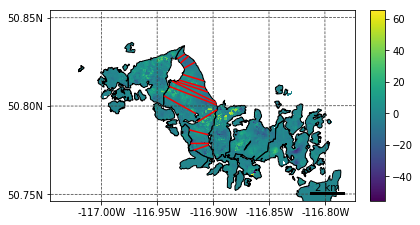

In [5]:
gates = 'conrad_flux_gates_17.shp'
points = fl_path + 'conrad_points_17gates_20m.shp' #'conrad_points_17gates.shp'
msk='conrad_2016_ice_msk_5m_glacieronly.tif'
# pts_ras = salem.open_xr_dataset(fl_path + 'FG_17_pts_20m.tif')
# ptsID = salem.open_xr_dataset(fl_path + 'FG_17_ptsID_20m.tif')


# open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
msk = salem.open_xr_dataset(path+ msk) 
msk = msk.to_array(name='msk')
gpr = salem.open_xr_dataset(gpr_path + 'conrad_obs_all_5m.tif')
# H_opt = salem.GeoNetcdf(opt_path + 'Conrad101sw_MAE_optimized.nc')
H_opt = salem.open_xr_dataset(fl_path + 'opt_thick_101sw_MAE_5m.tif') #'Conrad101sw_MAE_optimized.nc'
#     pts = salem.read_shapefile(fl_path+pts)
gates = salem.read_shapefile(fl_path+gates)
# msk[msk == 0.0] = 2.0
# msk[msk == 1.0] = np.nan
# pts_ras = pts_ras.to_array()
# ptsID = ptsID.to_array()
vx = vx.to_array(name='vx')
# np.shape(vx[0]) remove index 1 i.e.: 1,2000,3000
vy = vy.to_array(name='vy')
gpr = gpr.to_array(name='gpr')
H_opt = H_opt.to_array(name='H_opt')


# ptsID.data[ptsID.data<-1000] = np.nan
# pts_ras.data[pts_ras.data<-1000] = np.nan
gpr.data[gpr.data<0] = np.nan
vx.data[msk.data==0] = np.nan
vy.data[msk.data==0] = np.nan

#     # map extent
# grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000)) ##zoomed out view
grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
sm.set_data(vx)

#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()
plt.show()

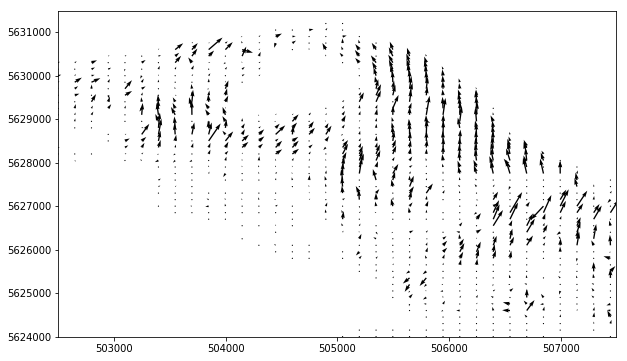

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,6))


df = salem.read_shapefile(fl_path + 'conrad_points_17gates_20m_wgs84.shp')

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['lon'] = coords[:, 0]
df['lat'] = coords[:, 1]
# df['lon'] = df[4]
# df['lat'] = df[5]


xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
df['x'] = xx
df['y'] = yy

ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);


X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
U = vx.data[0]
V = vy.data[0]

# Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')
ax.set_xlim(502500, 507500)
ax.set_ylim( 5624000, 5631500)
#     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
plt.savefig(fl_path+ 'products/'+ 'conrad_16_17_quiver.pdf', dpi=300)

In [10]:
# grid = vx.salem.grid  ##full view
# sm = Map(grid, countries=False)
# sm.set_lonlat_contours(interval=0)
# sm.set_scale_bar()
# sm.set_data(vx)

# #      Change the lon-lat countour setting
# sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


# shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
# gdf = salem.read_shapefile(shpf)
# sm.set_shapefile(gdf, linewidth=1)
# sm.set_shapefile(gates, linewidth=1.5, color='r')
# sm.visualize()

In [11]:
vns = ['vx',
       'vy',
       'gpr',
       'H_opt',
       #'msk',
       ]

In [12]:
vns

['vx', 'vy', 'gpr', 'H_opt']

In [13]:
M = xr.merge([vx,vy,gpr,H_opt])

In [14]:
for vn in vns:
    df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

In [15]:
df

,ID,length,distance,angle,geometry,min_x,max_x,min_y,max_y,lon,lat,x,y,vx,vy,gpr,H_opt
0,2,782.252,0.0,61.368576,POINT (-116.9259650308174 50.82143882883324),-116.925965,-116.925965,50.821439,50.821439,-116.925965,50.821439,505214.918200,5.629971e+06,NaN,NaN,NaN,59.788406
1,2,782.252,20.0,61.368576,POINT (-116.925715678521 50.82152485234388),-116.925716,-116.925716,50.821525,50.821525,-116.925716,50.821525,505232.472606,5.629981e+06,-2.440528,5.582760,NaN,59.788406
2,2,782.252,40.0,61.368576,POINT (-116.9254663253086 50.82161087532001),-116.925466,-116.925466,50.821611,50.821611,-116.925466,50.821611,505250.027012,5.629990e+06,-3.910453,8.886530,NaN,59.788406
3,2,782.252,60.0,61.368576,POINT (-116.9252169711804 50.8216968977616),-116.925217,-116.925217,50.821697,50.821697,-116.925217,50.821697,505267.581418,5.630000e+06,-3.811575,9.242476,NaN,72.055252
4,2,782.252,80.0,61.368576,POINT (-116.9249676161363 50.82178291966868),-116.924968,-116.924968,50.821783,50.821783,-116.924968,50.821783,505285.135824,5.630009e+06,-5.026195,14.856584,NaN,121.214302
5,2,782.252,100.0,61.368576,POINT (-116.9247182601763 50.8218689410412),-116.924718,-116.924718,50.821869,50.821869,-116.924718,50.821869,505302.690231,5.630019e+06,-3.896853,11.516027,69.650000,121.214302
6,2,782.252,120.0,61.368576,POINT (-116.9244689033004 50.82195496187919),-116.924469,-116.924469,50.821955,50.821955,-116.924469,50.821955,505320.244637,5.630029e+06,-5.585371,15.484585,NaN,121.214302
7,2,782.252,140.0,61.368576,POINT (-116.9242195455086 50.82204098218262),-116.924220,-116.924220,50.822041,50.822041,-116.924220,50.822041,505337.799043,5.630038e+06,-9.580359,24.195636,NaN,121.214302
8,2,782.252,160.0,61.368576,POINT (-116.9239701868009 50.82212700195151),-116.923970,-116.923970,50.822127,50.822127,-116.923970,50.822127,505355.353449,5.630048e+06,-7.396264,18.165467,NaN,121.214302
9,2,782.252,180.0,61.368576,POINT (-116.9237208271773 50.82221302118582),-116.923721,-116.923721,50.822213,50.822213,-116.923721,50.822213,505372.907855,5.630057e+06,-10.844764,26.682447,117.530000,121.214302


In [16]:
# grid.ij_coordinates
# v_crs = check_crs(vx)
# v_crs

In [19]:
df_agg = df[['ID', 'length', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
df_agg['i'] = ii
df_agg['j'] = jj
# # We trick by creating an index of similar i's and j's
# df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
df_agg = df_agg.groupby('ij').mean()

In [20]:
# Select
for vn in vns:
    df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))

In [22]:
D = df_agg[['ID', 'length', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'gpr', 'H_opt']].copy()
D

,ID,length,distance,angle,lon,lat,vx,vy,gpr,H_opt
ij,,,,,,,,,,
1429_1074,8,2297.359,0.0,119.223461,-116.944057,50.805831,9.381188,15.005661,NaN,68.134018
1433_1076,8,2297.359,20.0,119.223461,-116.943810,50.805743,12.873265,14.693120,NaN,68.134018
1436_1078,8,2297.359,40.0,119.223461,-116.943562,50.805655,12.392245,13.185260,NaN,68.134018
1440_1080,8,2297.359,60.0,119.223461,-116.943314,50.805567,8.889536,9.348963,NaN,65.189636
1443_1082,8,2297.359,80.0,119.223461,-116.943067,50.805479,16.061119,13.717829,NaN,65.189636
1447_1084,8,2297.359,100.0,119.223461,-116.942819,50.805391,4.062439,8.723014,NaN,65.189636
1450_1086,8,2297.359,120.0,119.223461,-116.942572,50.805303,4.510988,6.673593,NaN,65.189636
1454_1088,8,2297.359,140.0,119.223461,-116.942324,50.805216,-0.069296,4.736941,NaN,59.816944
1457_1090,8,2297.359,160.0,119.223461,-116.942076,50.805128,-0.173039,3.683546,NaN,54.381569


In [24]:
import math
D['vz'] = np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 ) 
D['vzdir'] = np.arccos(D.vx/D.vz) *180/math.pi #degrees from north


### calculate angle of flux gate
#try making a raster with footprint of vel. raster with FG angle as the value
# FG_alpha = pts_ras.data - 90.0 # calculate normal angle to flux gate 

#multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.)))
D['Qopt'] = D.vfg * 20. * D.H_opt

In [26]:
D[:4]

,ID,length,distance,angle,lon,lat,vx,vy,gpr,H_opt,vz,vzdir,vfg,Qopt
ij,,,,,,,,,,,,,,
1429_1074,8,2297.359,0.0,119.223461,-116.944057,50.805831,9.381188,15.005661,NaN,68.134018,17.696796,57.987339,15.513193,21139.522982
1433_1076,8,2297.359,20.0,119.223461,-116.943810,50.805743,12.873265,14.693120,NaN,68.134018,19.534809,48.777027,18.408217,25084.515948
1436_1078,8,2297.359,40.0,119.223461,-116.943562,50.805655,12.392245,13.185260,NaN,68.134018,18.094719,46.775852,17.252258,23509.312472
1440_1080,8,2297.359,60.0,119.223461,-116.943314,50.805567,8.889536,9.348963,NaN,65.189636,12.900658,46.442974,12.322419,16065.880480


In [27]:
# x = range(D.ID[D.ID==n].count())
t=len(range(D.ID[D.ID==0].count()))-1
t

27

In [61]:
Q_out= [0.,]


for n in range(D.ID.nunique()+2):
        Q_out.append(D.Qopt[D.ID==n].sum()) 
        
Q_in = [Q_out[1:]]
Q_in = np.squeeze(Q_in)
FG = pd.DataFrame(list(zip(Q_out, Q_in)), columns=['Q_out', 'Q_in']) 

In [58]:
D.ID.nunique()

13

In [64]:
FG['Q_net'] = FG.Q_in - FG.Q_out 
FG

,Q_out,Q_in,Q_net
0,0.000000e+00,2.958594e+05,2.958594e+05
1,2.958594e+05,1.226559e+06,9.306996e+05
2,1.226559e+06,1.935256e+06,7.086968e+05
3,1.935256e+06,1.574363e+06,-3.608930e+05
4,1.574363e+06,1.501231e+06,-7.313163e+04
5,1.501231e+06,2.827626e+06,1.326395e+06
6,2.827626e+06,5.427835e+06,2.600209e+06
7,5.427835e+06,5.803410e+06,3.755750e+05
8,5.803410e+06,9.303674e+05,-4.873042e+06
9,9.303674e+05,8.652124e+05,-6.515493e+04


In [37]:
below_gate

NameError: name 'below_gate' is not defined

In [ ]:
data = pd.read_csv(fl_path + 'conrad_data.csv') #need dh_dt, area, field pts, n, mid elev (mean elev)
SA = 

In [ ]:
[len(Q_out)+1.]

In [ ]:
i = int(len(Q_out)-2)
i

In [ ]:
i == len(Q_out)
i

In [ ]:
zzz= range(D.Qopt[D.ID==12].count())
zzz

In [ ]:
for n in range(D.ID.nunique()):
  
    for c in range(D.ID[D.ID==n].count()):
        if c==0:
            A= D.distance[D.ID==n][c] + D.distance[D.ID==n][c+1] * D.H_opt[D.ID==n][c+1]*0.5 #area of triangle
        elif c==1:
            A= (D.distance[D.ID==n][c+1] - D.distance[D.ID==n][c])/2 * D.H_opt[D.ID==n][c]
        elif c==(len(range(D.ID[D.ID==n].count())-2): #
            A= (D.distance[D.ID==n][c] - D.distance[D.ID==n][c+1])/2 * D.H_opt[D.ID==n]
        elif c==(len(range(D.ID[D.ID==n].count())-1):  #last point in line
            A= D.distance[D.ID==n][c] + D.distance[D.ID==n][c+1] * D.H_opt[D.ID==n][c-1]*0.5 #area of triangle
        else:
            A= [((D.distance[D.ID==n][c] + D.distance[D.ID==n][c+1])/2) + ((D.distance[D.ID==n][c] +
                D.distance[D.ID==n][c-1])/2)]* D.H_opt[D.ID==n][c-1]
        Q+=(vfg*A)
#     A = D.vfg[D.ID==n] * D.H_opt[D.ID==n]
#     H = 
     

In [ ]:
for i in range(12):
    # pull out each value and save it in the dataframe called data
    F=FG_alpha
    IDX= np.ma.where(F <-90)
    for i in np.arange(0,len(IDX[0])):
        V=F[IDX[0][i]][IDX[1][i]]
        
#     for i in np.arange(0,len(IDX2[0])):
#         V2=K2[IDX2[0][i]][IDX2[1][i]]
    
    data=data.append({'Z': V,'glacier':glacier_abb[count],'source':'Optimized'},ignore_index=True)
#         data=data.appen
    

In [ ]:
# vel_Z_dir.attrs['pyproj_srs'] = vx.attrs['pyproj_srs']

In [ ]:
fig, ax = plt.subplots()

# # grid = mercator_grid(center_ll=(-116.92, 50.80), extent=(10000, 10000))
# grid = vx.salem.grid
# sm = Map(grid, countries=False)
# sm.set_lonlat_contours(interval=0)
# sm.set_scale_bar()
# # sm.set_data(D.gpr)  #label='Degrees'
# #      Change the lon-lat countour setting
# sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


# shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
# gdf = salem.read_shapefile(shpf)
# sm.set_shapefile(gdf, linewidth=1)
# sm.set_shapefile(gates, linewidth=1.5, color='r')
# sm.visualize()
ax.scatter(D.E, D.N, marker='o', c=D.gpr, cmap='viridis',s=100)#, ax=ax)
plt.savefig(fl_path + 'products/' + 'conrad_16_17_vel_dir.pdf', dpi=300)
plt.show()

In [ ]:
fl_path

In [ ]:
D.to_csv(fl_path+'conrad_gpr_pts.csv')

In [ ]:
vx.to_netcdf(fl_path + 'Conrad_16_17ss' + '_vx.nc')
vy.to_netcdf(fl_path + 'Conrad_16_17ss' + '_vy.nc')

In [ ]:
VX_nc = fl_path + 'Conrad_16_17ss' + '_vx.nc'
VX_nc = xr.open_dataset(VX_nc)
VX_nc

In [ ]:
df = salem.read_shapefile(fl_path + 'conrad_points_17gates.shp')

In [ ]:
df = salem.read_shapefile(fl_path + 'conrad_points_17gates.shp')

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['E'] = coords[:, 0]
df['N'] = coords[:, 1]

In [ ]:
df

In [ ]:
d = np.arccos(5/15) *180/math.pi #degrees from north
d